In [1]:
import warnings 

warnings.filterwarnings("ignore", category=DeprecationWarning)

import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt 

In [2]:
import os
print(os.listdir())

import seaborn as sns
import re
import matplotlib.pyplot as plt
import missingno as ms

import seaborn as sns
# from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

from wordcloud import WordCloud, STOPWORDS

import nltk

['.ipynb_checkpoints', 'Data Preprocessing dl.ipynb', 'Deep_Learning_testing_code.ipynb', 'Deep_Learning_training.ipynb', 'finetuned_BERT_epoch_2.model', 'preprocessing for DL.ipynb', 'test_dl.csv', 'train_dl.csv']


In [3]:
from nltk.corpus import stopwords
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [4]:
train = pd.read_csv('game_train.csv')
test = pd.read_csv('game_test.csv')#to read and store in panda dataframe

In [5]:
nltk.download('stopwords')
eng_stops = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to C:\Users\HP-
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer() 

In [7]:
train.head()

,review_id,title,year,user_review,user_suggestion
0,473,Sakura Clicker,2017.0,This has helped me through my stage 8 terminal...,1
1,22971,Crusaders of the Lost Idols,2017.0,Awesome idea. I support this game. I love that...,1
2,18225,RaceRoom Racing Experience,2014.0,"This game is just, such a♥♥♥♥♥♥take. The devel...",0
3,17132,Black Squad,2018.0,Early Access Reviewhere what i honesty think a...,1
4,8103,DCS World Steam Edition,2014.0,Very detailed sim and a joy to fly using a fli...,1


In [8]:
df = train.copy()
df2 = test.copy()

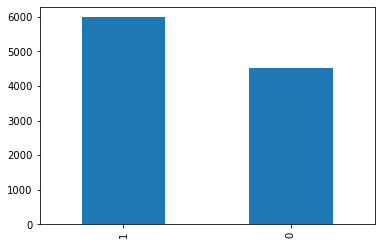

In [9]:
df.user_suggestion.value_counts().plot(kind = 'bar');

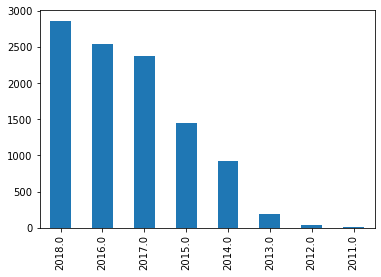

In [10]:
df.year.value_counts().plot(kind = 'bar');

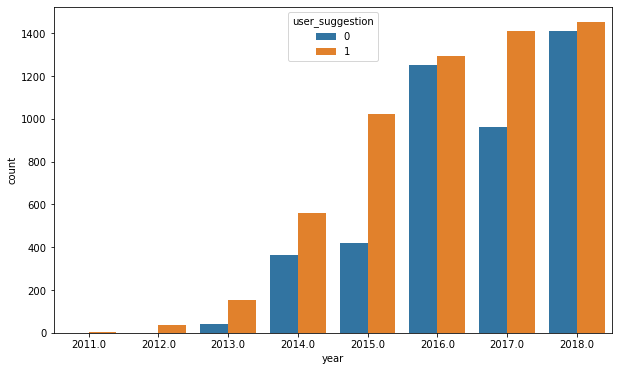

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(x='year', hue='user_suggestion', data=df)
plt.show()

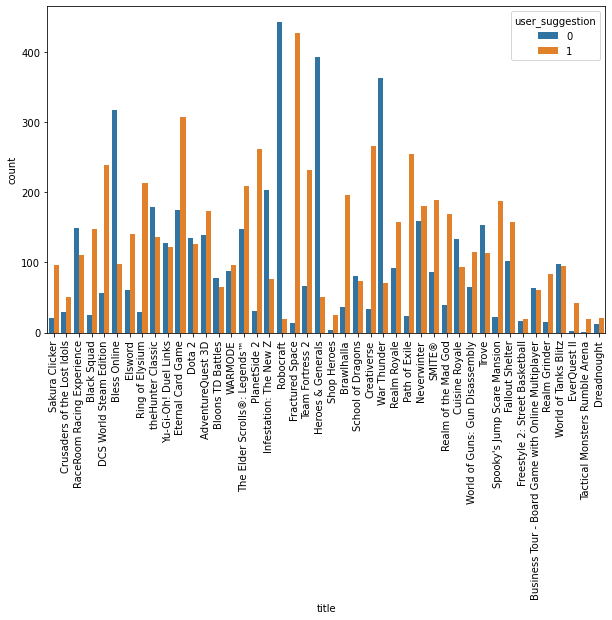

In [12]:
plt.figure(figsize=(10, 6))
plt.xticks(rotation = 90)
sns.countplot(x='title', hue='user_suggestion', data=df)
plt.show()

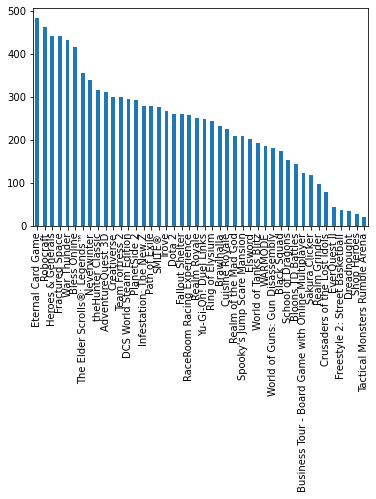

In [13]:
df.title.value_counts().plot(kind = 'bar');

In [17]:
df.isnull().sum()

review_id            0
title                0
year               108
user_review          0
user_suggestion      0
dtype: int64

In [19]:
df2.isnull().sum()

review_id       0
title           0
year           70
user_review     0
dtype: int64

In [20]:
#library that contains punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [21]:
from nltk.stem import WordNetLemmatizer
#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()

In [22]:
def clean_text(text):
    text = "".join([i for i in text if i not in string.punctuation])
    text = text.lower()
    text_list = text.split()
    lam_word = [wordnet_lemmatizer.lemmatize(word) for word in text_list]
    text = " ".join(lam_word)
    return text

In [23]:
df['user_review']= df['user_review'].apply(lambda x:clean_text(x))
df['title'] = df['title'].apply(lambda x:clean_text(x))
df.head()

,review_id,title,year,user_review,user_suggestion
0,473,sakura clicker,2017.0,this ha helped me through my stage 8 terminal ...,1
1,22971,crusader of the lost idol,2017.0,awesome idea i support this game i love that i...,1
2,18225,raceroom racing experience,2014.0,this game is just such a♥♥♥♥♥♥take the develop...,0
3,17132,black squad,2018.0,early access reviewhere what i honesty think a...,1
4,8103,dc world steam edition,2014.0,very detailed sim and a joy to fly using a fli...,1


In [24]:
df2['user_review']= df2['user_review'].apply(lambda x:clean_text(x))
df2['title'] = df2['title'].apply(lambda x:clean_text(x))
df2.head()

,review_id,title,year,user_review
0,1,spookys jump scare mansion,2016.0,im scared and hearing creepy voice so ill paus...
1,2,spookys jump scare mansion,2016.0,best game more better than sam pepper youtube ...
2,3,spookys jump scare mansion,2016.0,a littly iffy on the control but once you know...
3,4,spookys jump scare mansion,2015.0,great game fun and colorful and all thata side...
4,6,spookys jump scare mansion,2015.0,early access reviewits pretty cute at first bu...


In [25]:
df2.isnull().sum()

review_id       0
title           0
year           70
user_review     0
dtype: int64

In [26]:
df.fillna(df.median() , inplace = True)

In [27]:
df2.fillna(df2.median() , inplace = True)

In [37]:
df['year'] = df['year'].map(str)
df2['year'] = df2['year'].map(str)

In [38]:
df['Body'] = df['year'] + ' ' + df['title'] + ' ' + df['user_review']
df2['Body'] = df2['year'] + ' ' +df2['title'] + ' ' + df2['user_review']

In [42]:
df.head()

,review_id,title,year,user_review,user_suggestion,body,Body,Labels
0,473,sakura clicker,2017.0,this ha helped me through my stage 8 terminal ...,1,sakura clicker this ha helped me through my st...,2017.0 sakura clicker this ha helped me throug...,1
1,22971,crusader of the lost idol,2017.0,awesome idea i support this game i love that i...,1,crusader of the lost idol awesome idea i suppo...,2017.0 crusader of the lost idol awesome idea ...,1
2,18225,raceroom racing experience,2014.0,this game is just such a♥♥♥♥♥♥take the develop...,0,raceroom racing experience this game is just s...,2014.0 raceroom racing experience this game is...,0
3,17132,black squad,2018.0,early access reviewhere what i honesty think a...,1,black squad early access reviewhere what i hon...,2018.0 black squad early access reviewhere wha...,1
4,8103,dc world steam edition,2014.0,very detailed sim and a joy to fly using a fli...,1,dc world steam edition very detailed sim and a...,2014.0 dc world steam edition very detailed si...,1


In [43]:
df.columns

Index(['review_id', 'title', 'year', 'user_review', 'user_suggestion', 'body',
       'Body', 'Labels'],
      dtype='object')

In [44]:
df['Labels'] = df['user_suggestion']
#df2['Labels'] = df2['user_suggestion']

In [45]:
train_df = df[['Body','Labels']]
test_df = df2[['review_id','Body']]

In [46]:
train_df.to_csv('train_dl.csv',index = False)
test_df.to_csv('test_dl.csv',index = False)